#  <font color="blue">Note</font>

##  <font color="#E14C2E">之前的結果</font>


### batch_size = 32&nbsp; ,&nbsp;  image_size = 224&nbsp;  ,&nbsp;  epoch = 8
  
 <br>   
    
####     &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;           測試結果       &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;  &emsp;&emsp;&emsp;&emsp;                   測試結果

*  resnet34    &nbsp;&nbsp;&emsp;     0.744375   &emsp;     * densenet121  &emsp;    0.771875
*  resnet50    &nbsp;&nbsp;&emsp;    0.753125    &emsp;    * densenet169    &emsp;  0.785
*  resnet101  &emsp;    0.76375                  &nbsp;&emsp;&nbsp;   * densenet201  &emsp;    0.794375
*  resnet152  &emsp;   0.764375
<br> <br> 

<hr style="height:5px;background-color:#25A913">

###  <font color="#E14C2E">調整batch_size , image_size</font>

### batch_size = 8&nbsp; , &nbsp;image_size = 448&nbsp; ,&nbsp; epoch = 8

<br>

####       &emsp;&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp;  &emsp;            valid_loss     &emsp;&emsp;&emsp; &emsp;&emsp; &emsp;     accuracy    &emsp; &emsp;&emsp;&emsp; &emsp; &emsp; &emsp;     recall

*  densenet201   &emsp; &nbsp;   0.470928  &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;     0.794692 &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;      0.797879  

<br>

### batch_size = 64&nbsp;  , &nbsp; image_size = 112&nbsp;  , &nbsp; epoch =15

<br>

####       &emsp;&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp;  &emsp;            valid_loss     &emsp;&emsp;&emsp; &emsp;&emsp; &emsp;     accuracy    &emsp; &emsp;&emsp;&emsp; &emsp; &emsp; &emsp;     recall

*  densenet201   &emsp; &nbsp;   0.552136  &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;     0.782201 &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;      0.784134
 
<br>

<hr style="height:5px;background-color:#25A913">


###  <font color="#E14C2E">雙模型</font>
 
### 先分C再分Ａ     
####       &emsp;&emsp; &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp;&nbsp;&nbsp;           測試結果

* densnet201    &emsp;&emsp; &emsp; &nbsp;     0.79

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import seaborn as sns
import numpy as np

In [3]:
from fastai import *
from fastai.vision import *
from fastai.vision.learner import cnn_config
from fastai.callbacks import *
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import cv2
import shutil
import math
from math import floor
from fastai2.test_utils import *

In [4]:
import torch
torch.__version__

'1.5.1+cu101'

In [5]:
torch.cuda.is_available()

True

In [6]:
#!pip freeze > requirements.txt

In [7]:
!pip list

Package                              Version            
------------------------------------ -------------------
absl-py                              0.8.0              
adal                                 1.2.2              
ansiwrap                             0.8.4              
applicationinsights                  0.11.9             
astor                                0.8.0              
attrs                                19.3.0             
azure-common                         1.1.23             
azure-graphrbac                      0.61.1             
azure-mgmt-authorization             0.60.0             
azure-mgmt-containerregistry         2.8.0              
azure-mgmt-keyvault                  2.0.0              
azure-mgmt-resource                  5.1.0              
azure-mgmt-storage                   6.0.0              
azure-storage-blob                   2.1.0              
azure-storage-common                 2.1.0              
azureml-automl-core            

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import zipfile
import os
def zipimage(data_name):
    cwd=os.getcwd()
    filename = data_name
    filepath = os.path.join(cwd, filename)
    with zipfile.ZipFile(filepath, 'r') as zip:
        zip.extractall()

In [10]:
#zipimage("C1-P1_Test.zip")
#zipimage("mango.zip")

# EDA

In [11]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('dev.csv')

In [12]:
df2=pd.concat([df,df1], ignore_index=True)

In [13]:
countA=len(df2['label'][df2['label']=='A'])
countB=len(df2['label'][df2['label']=='B'])
countC=len(df2['label'][df2['label']=='C'])

<BarContainer object of 3 artists>

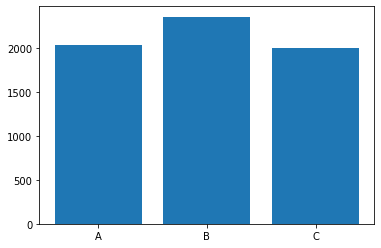

In [14]:
x=[countA,countB,countC]
plt.bar(['A','B','C'],height=x)

In [15]:
def concate_train_valid(imgfile:str,foldername:str):
    path=os.getcwd()+'/'+imgfile
    for ii in os.listdir(path):
        if ii!='.ipynb_checkpoints':
            shutil.copyfile(path+'/'+ii,os.getcwd()+'/'+foldername+'/'+ii)

In [16]:
"""
os.mkdir(os.getcwd()+'/train_images')
concate_train_valid('C1-P1_Train','train_images')
concate_train_valid('C1-P1_Dev','train_images')
"""

"\nos.mkdir(os.getcwd()+'/train_images')\nconcate_train_valid('C1-P1_Train','train_images')\nconcate_train_valid('C1-P1_Dev','train_images')\n"

In [17]:
img_height=[]
img_width=[]
def img_stat():
    path=os.getcwd()+"/train_images"
    for ii in os.listdir(path):
        img=cv2.imread(path+'/'+ii)
        if type(img)!=type(None):
            img_height.append(img.shape[0])
            img_width.append(img.shape[1])
img_stat()

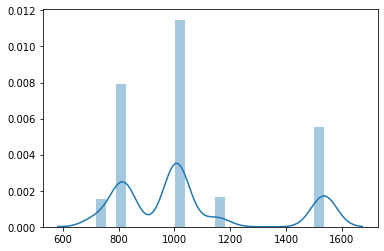

In [18]:
sns.distplot(img_height)

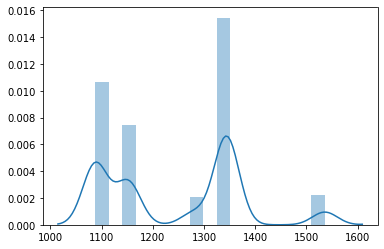

In [19]:
sns.distplot(img_width)

In [20]:
print(max(img_height))
print(min(img_height))
print(np.mean(img_height))
print('\n')
print(max(img_width))
print(min(img_width))
print(np.mean(img_width))

1536
720
1050.5925


1536
1088
1241.71


In [21]:
img_height=[]
img_width=[]
def img_stat():
    path=os.getcwd()+"/C1-P1_Test"
    for ii in os.listdir(path):
        img=cv2.imread(path+'/'+ii)
        img_height.append(img.shape[0])
        img_width.append(img.shape[1])
img_stat()

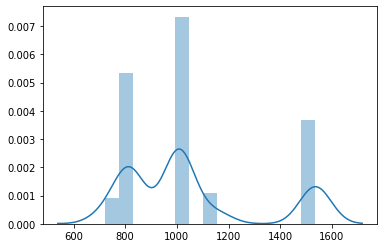

In [22]:
sns.distplot(img_height)

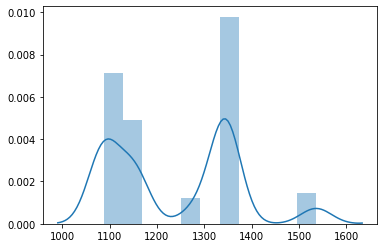

In [23]:
sns.distplot(img_width)

In [24]:
print(max(img_height))
print(min(img_height))
print(np.mean(img_height))
print('\n')
print(max(img_width))
print(min(img_width))
print(np.mean(img_width))

1536
720
1052.1


1536
1088
1239.24


# 設置資料集

In [25]:
def image_to_folder(imagefile:str,foldername:str):
    path=os.getcwd()+'/'+imagefile
    if imagefile=="C1-P1_Dev":
        df=pd.read_csv("dev.csv")
    elif imagefile=="C1-P1_Train":
        df=pd.read_csv("train.csv")    
    for i,j in enumerate(df["label"]):
            if j=="A":
                shutil.copyfile(path+'/'+df['image_id'][i],os.getcwd()+'/'+foldername+'A'+'/'+df['image_id'][i])
            if j=="B":    
                shutil.copyfile(path+'/'+df['image_id'][i],os.getcwd()+'/'+foldername+'B'+'/'+df['image_id'][i])
            if j=="C":    
                shutil.copyfile(path+'/'+df['image_id'][i],os.getcwd()+'/'+foldername+'C'+'/'+df['image_id'][i])    

In [26]:
"""
os.mkdir(os.getcwd()+'/train_valid_testAB/valid')
os.mkdir(os.getcwd()+'/train_valid_testAB/train')
os.mkdir(os.getcwd()+'/train_valid_testAB')
os.mkdir(os.getcwd()+'/train_valid_test')
os.mkdir(os.getcwd()+'/train_valid_test'+'/train')
os.mkdir(os.getcwd()+'/train_valid_test'+'/train/im_A')
os.mkdir(os.getcwd()+'/train_valid_test'+'/train/im_B')
os.mkdir(os.getcwd()+'/train_valid_test'+'/train/im_C')
os.mkdir(os.getcwd()+'/train_valid_test'+'/valid')
os.mkdir(os.getcwd()+'/train_valid_test'+'/valid/im_A')
os.mkdir(os.getcwd()+'/train_valid_test'+'/valid/im_B')
os.mkdir(os.getcwd()+'/train_valid_test'+'/valid/im_C')
os.mkdir(os.getcwd()+'/train_valid_test'+'/test')
os.mkdir(os.getcwd()+'/image_C')
os.mkdir(os.getcwd()+'/image_B')
os.mkdir(os.getcwd()+'/image_A')
"""

"\nos.mkdir(os.getcwd()+'/train_valid_testAB/valid')\nos.mkdir(os.getcwd()+'/train_valid_testAB/train')\nos.mkdir(os.getcwd()+'/train_valid_testAB')\nos.mkdir(os.getcwd()+'/train_valid_test')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/train')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/train/im_A')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/train/im_B')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/train/im_C')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/valid')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/valid/im_A')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/valid/im_B')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/valid/im_C')\nos.mkdir(os.getcwd()+'/train_valid_test'+'/test')\nos.mkdir(os.getcwd()+'/image_C')\nos.mkdir(os.getcwd()+'/image_B')\nos.mkdir(os.getcwd()+'/image_A')\n"

In [27]:
#image_to_folder("C1-P1_Dev","image_")
#image_to_folder("C1-P1_Train","image_")

In [28]:
pathA=os.getcwd()+"/image_A"
pathB=os.getcwd()+"/image_B"
pathC=os.getcwd()+"/image_C"

In [29]:
def gen_train_valid(origin,destination:str):
    np.random.seed(42)
    indicies=np.arange(len(os.listdir(origin)))
    np.random.shuffle(indicies)
    for ii in list(indicies)[:floor(len(os.listdir(origin))*0.8)]:
        if not os.listdir(origin)[ii].endswith('jpg'):
            continue
        img = cv2.imread(origin+'/'+os.listdir(origin)[ii])
        if img.shape[0]<img.shape[1]:
            img=np.rot90(img)
        img=cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
        path = os.getcwd()+"/train_valid_test/train/"+destination
        cv2.imwrite(path+'/'+os.listdir(origin)[ii].replace('.jpg',"")+origin[-1]+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 100])
    for ii in list(indicies)[floor(len(os.listdir(origin))*0.8):]:
        if not os.listdir(origin)[ii].endswith('jpg'):
            continue
        img = cv2.imread(origin+'/'+os.listdir(origin)[ii])
        if img.shape[0]<img.shape[1]:
            img=np.rot90(img)
        path = os.getcwd()+"/train_valid_test/valid/"+destination
        img=cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(path+'/'+os.listdir(origin)[ii].replace('.jpg',"")+origin[-1]+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 100])    

In [30]:
def gen_test():
    path=os.getcwd()+"/C1-P1_Test"
    for ii in os.listdir(path):
        img=cv2.imread(path+'/'+ii)
        img=cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(os.getcwd()+"/train_valid_test/test/"+ii, img, [cv2.IMWRITE_JPEG_QUALITY, 100])
#gen_test()        

In [31]:
#gen_train_valid(pathA,"im_A")
#gen_train_valid(pathB,"im_B")
#gen_train_valid(pathC,"im_C")

In [32]:
path = os.getcwd()+"/train_valid_test"
data = ImageList.from_folder(path).split_by_folder('train','valid')

In [33]:
func = lambda x: str(x)[-5] 
data=data.label_from_func(func)

In [34]:
data

LabelLists;

Train: LabelList (5119 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
C,C,C,C,C
Path: /data/home/aistudent/notebooks/fastai/course-v3/nbs/dl1/train_valid_test;

Valid: LabelList (1281 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
C,C,C,C,C
Path: /data/home/aistudent/notebooks/fastai/course-v3/nbs/dl1/train_valid_test;

Test: None

In [35]:
tfms = get_transforms(do_flip=True,flip_vert=True)
bs=32
data=data.transform(tfms) \
          .databunch(bs=bs) \
          .normalize(imagenet_stats)

['A', 'B', 'C'] 3


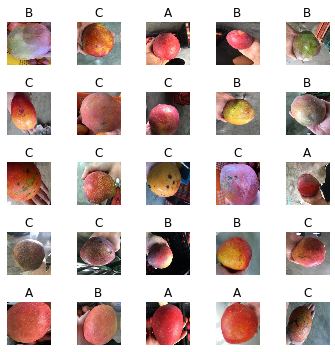

In [36]:
data.show_batch(rows=5,figsize=(5,5))
print(f'{data.classes} {data.c}')

# Model
<hr style="height:5px;background-color:red">

# Resnet

In [37]:
arch = models.resnet34

In [38]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True)

In [39]:
callbacks = [
SaveModelCallback(learn, monitor='recall',mode='max',name='res34')
,ShowGraph(learn),
]
learn.callbacks = callbacks

In [40]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


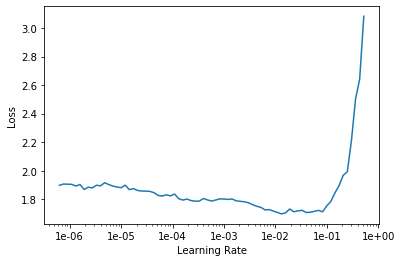

In [42]:
learn.recorder.plot()

Better model found at epoch 0 with recall value: 0.7025761008262634.


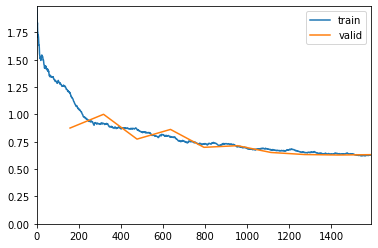

Better model found at epoch 2 with recall value: 0.7338017225265503.
Better model found at epoch 4 with recall value: 0.7556595802307129.
Better model found at epoch 5 with recall value: 0.7611241340637207.
Better model found at epoch 6 with recall value: 0.7868852615356445.
Better model found at epoch 7 with recall value: 0.7978142499923706.


In [43]:
#first train
learn.fit_one_cycle(10,max_lr=1e-02)

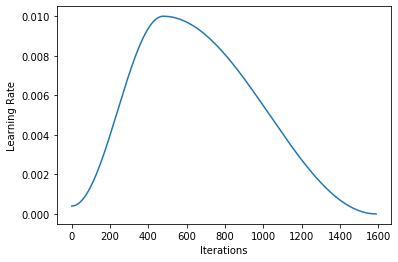

In [44]:
learn.recorder.plot_lr()

Better model found at epoch 0 with recall value: 0.7931303381919861.


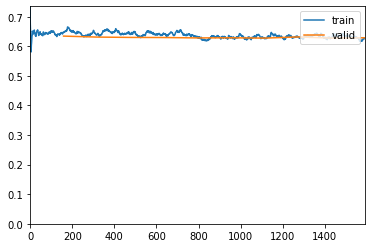

Better model found at epoch 1 with recall value: 0.7939109802246094.
Better model found at epoch 3 with recall value: 0.7970335483551025.
Better model found at epoch 4 with recall value: 0.7978142499923706.


In [45]:
#fine tune
learn.fit_one_cycle(10,max_lr=1e-04)

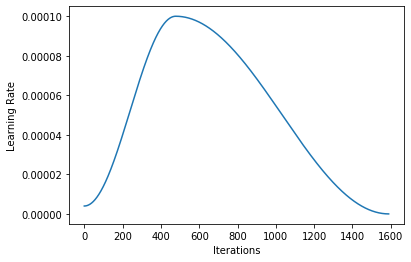

In [46]:
learn.recorder.plot_lr()

In [47]:
learn.save('resnet34_10_epochs')

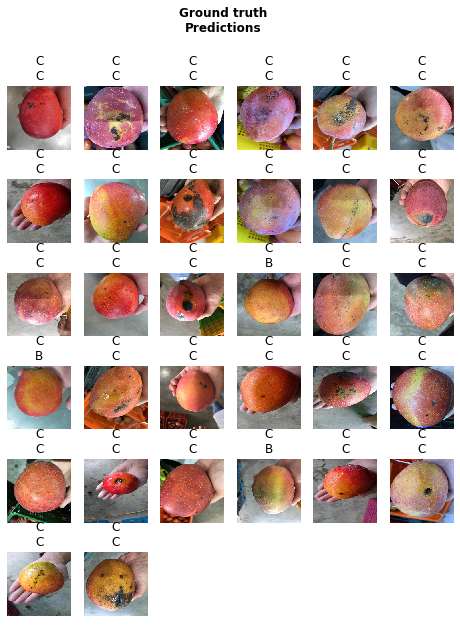

In [48]:
learn.show_results(ds_type=DatasetType.Valid, rows=6, figsize=(8,10))

In [49]:
interp=ClassificationInterpretation.from_learner(learn)

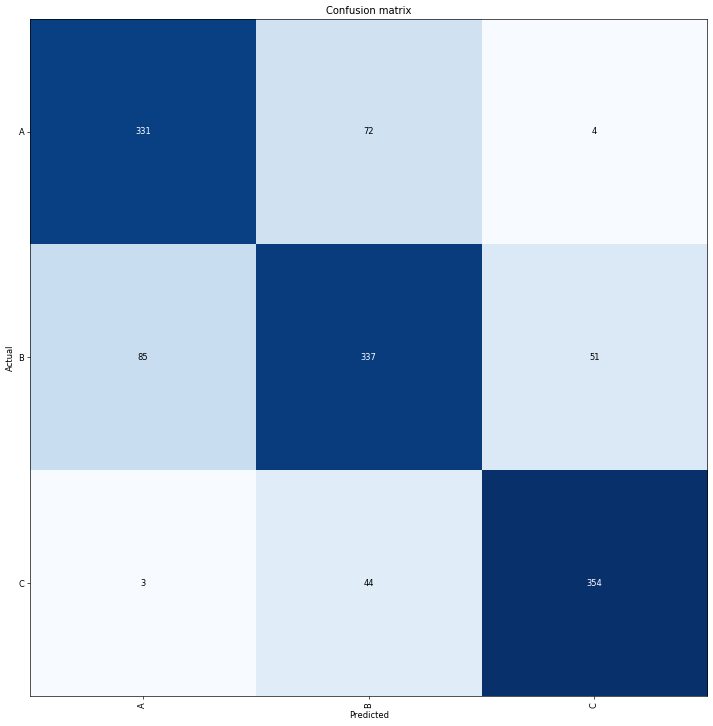

In [50]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

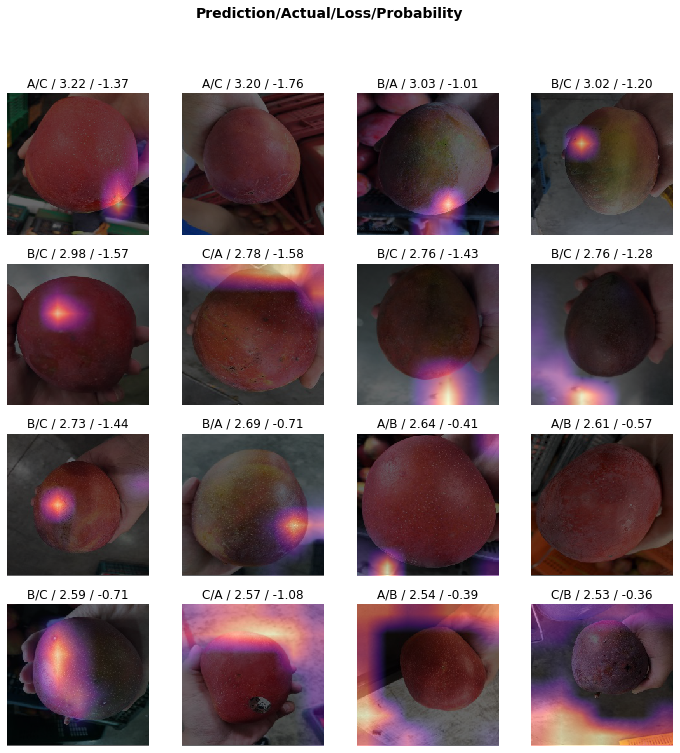

In [51]:
interp.plot_top_losses(16,heatmap=True)

# Densenet

In [52]:
arch = models.densenet121

In [53]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True)

In [54]:
callbacks = [
SaveModelCallback(learn, monitor='recall',mode='max',name='densenet121')
,ShowGraph(learn),
]
learn.callbacks = callbacks

In [55]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


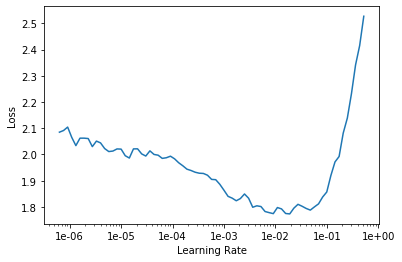

In [56]:
learn.lr_find()
learn.recorder.plot()

Better model found at epoch 0 with recall value: 0.6760343909263611.


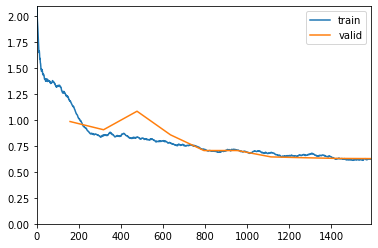

Better model found at epoch 4 with recall value: 0.772053062915802.
Better model found at epoch 6 with recall value: 0.7751755714416504.
Better model found at epoch 7 with recall value: 0.7946916818618774.
Better model found at epoch 8 with recall value: 0.796252965927124.


In [57]:
#first train
learn.fit_one_cycle(10,max_lr=1e-02)

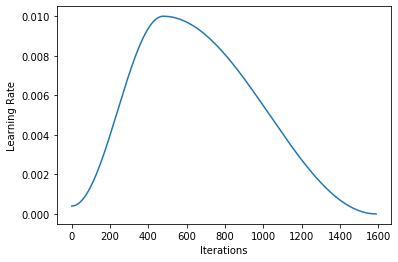

In [58]:
learn.recorder.plot_lr()

Better model found at epoch 0 with recall value: 0.8017174005508423.


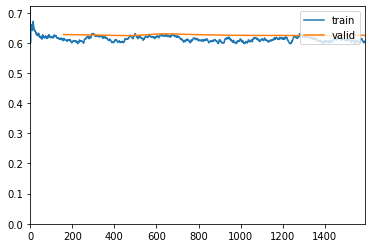

Better model found at epoch 6 with recall value: 0.8024979829788208.


In [59]:
#fine tune
learn.fit_one_cycle(10,max_lr=1e-04)

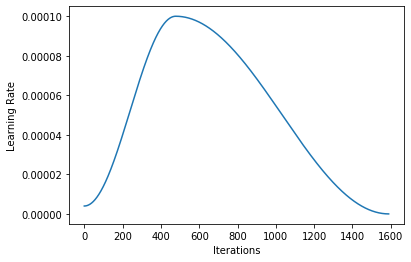

In [60]:
learn.recorder.plot_lr()

In [61]:
learn.save('densenet121_10_epochs')

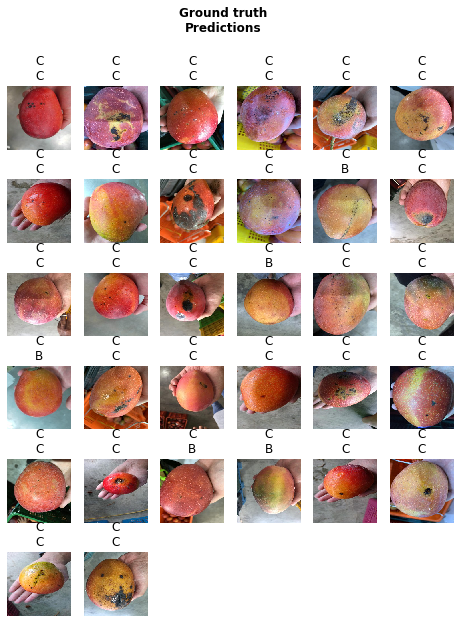

In [62]:
learn.show_results(ds_type=DatasetType.Valid, rows=6, figsize=(8,10))

In [64]:
interp=ClassificationInterpretation.from_learner(learn)

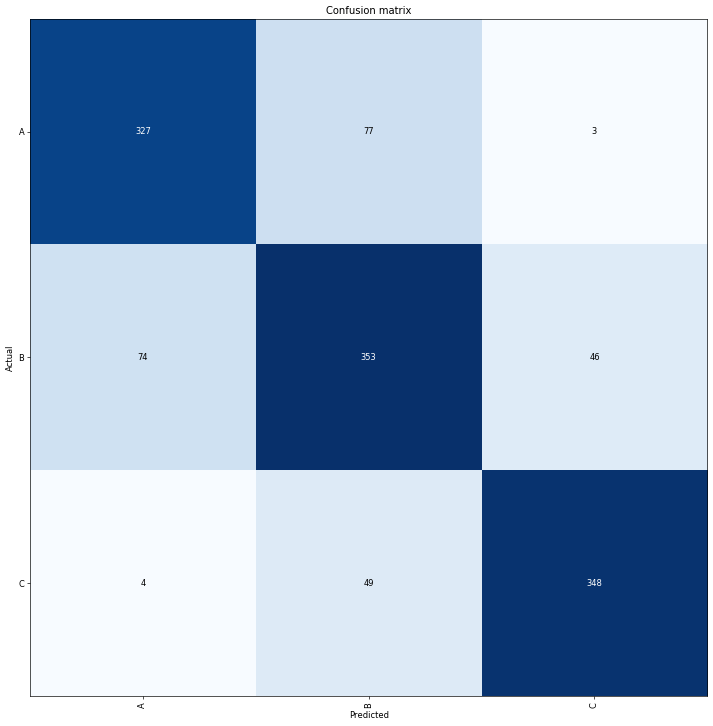

In [65]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

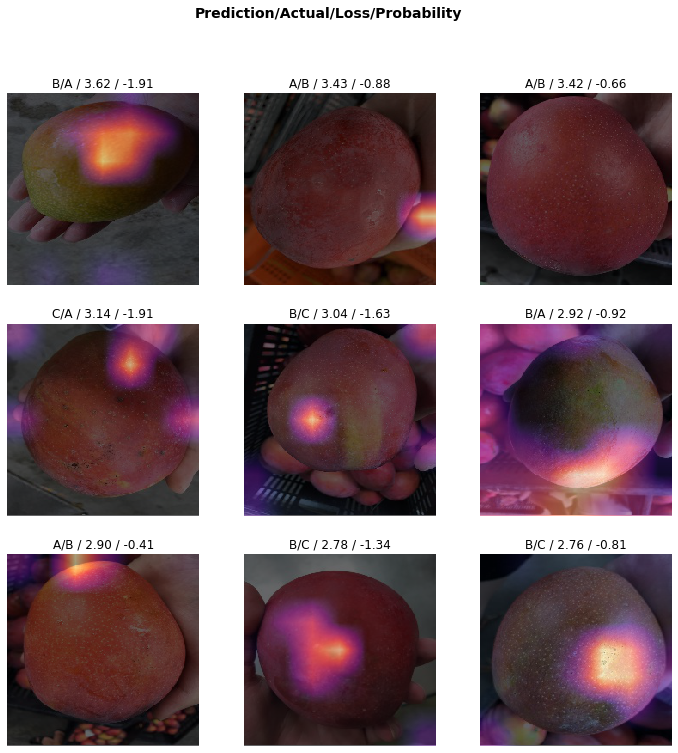

In [75]:
interp.plot_top_losses(9,heatmap=True)

<hr style="height:5px;background-color:red">

# 雙模型

### first

In [76]:
path = os.getcwd()+"/train_valid_test"
data = ImageList.from_folder(path)
data=data.split_by_folder('train','valid')
func = lambda x: str(x)[-5] if (str(x)[-5])=='C' else 'O'
data=data.label_from_func(func)
tfms = get_transforms(do_flip=True,flip_vert=True)
bs=32
data=data.transform(tfms) \
          .databunch(bs=bs) \
          .normalize(imagenet_stats)

In [77]:
arch = models.densenet121

In [78]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True)

In [79]:
callbacks = [
SaveModelCallback(learn, monitor='recall',mode='max',name='densenet121_first')
,ShowGraph(learn),
]
learn.callbacks = callbacks

In [80]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


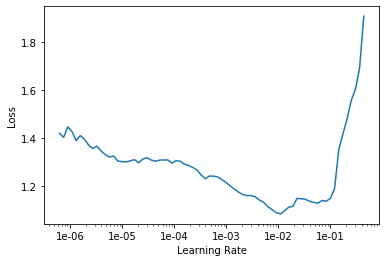

In [81]:
learn.lr_find()
learn.recorder.plot()

Better model found at epoch 0 with recall value: 0.8665105700492859.


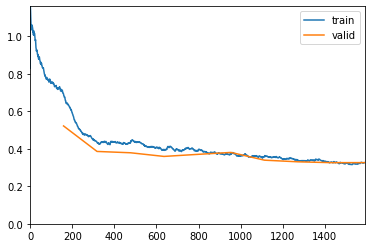

Better model found at epoch 1 with recall value: 0.8868072032928467.
Better model found at epoch 2 with recall value: 0.9094457626342773.
Better model found at epoch 6 with recall value: 0.9211553335189819.


In [82]:
#first train
learn.fit_one_cycle(10,max_lr=7e-03)

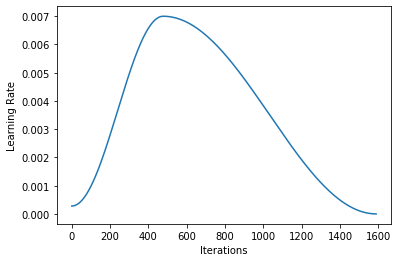

In [83]:
learn.recorder.plot_lr()

Better model found at epoch 0 with recall value: 0.9258391857147217.


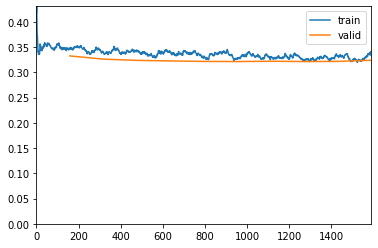

Better model found at epoch 3 with recall value: 0.9274004697799683.


In [84]:
#fine tune
learn.fit_one_cycle(10,max_lr=7e-05)

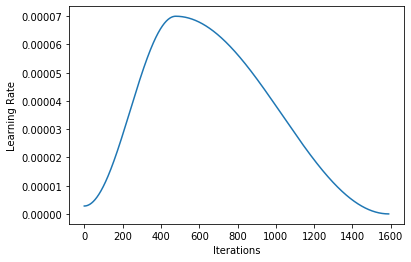

In [85]:
learn.recorder.plot_lr()

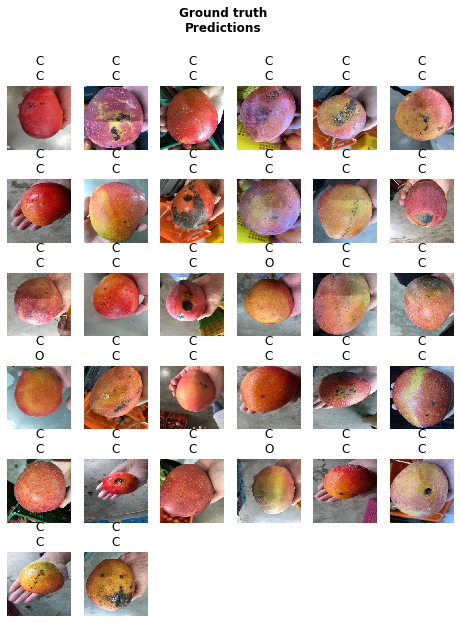

In [86]:
learn.show_results(ds_type=DatasetType.Valid, rows=6, figsize=(8,10))

In [87]:
interp=ClassificationInterpretation.from_learner(learn)

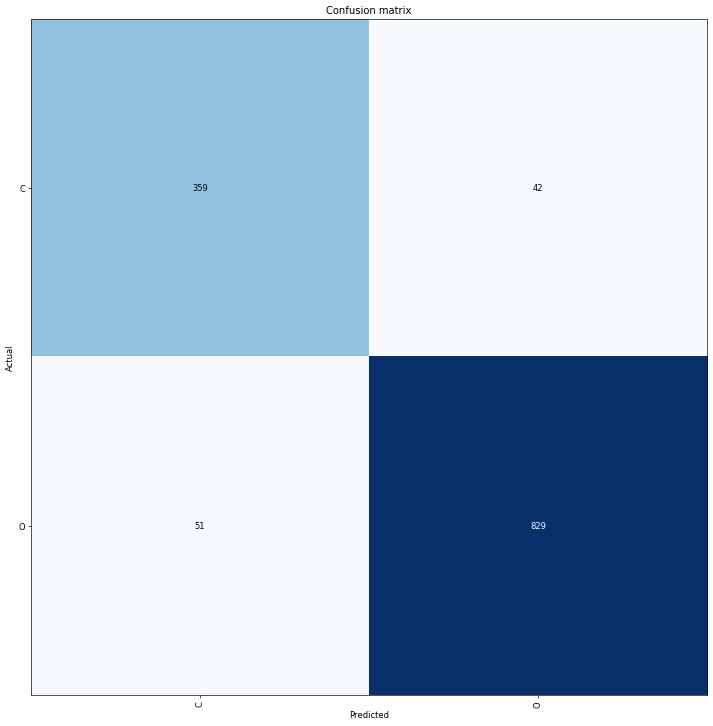

In [88]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

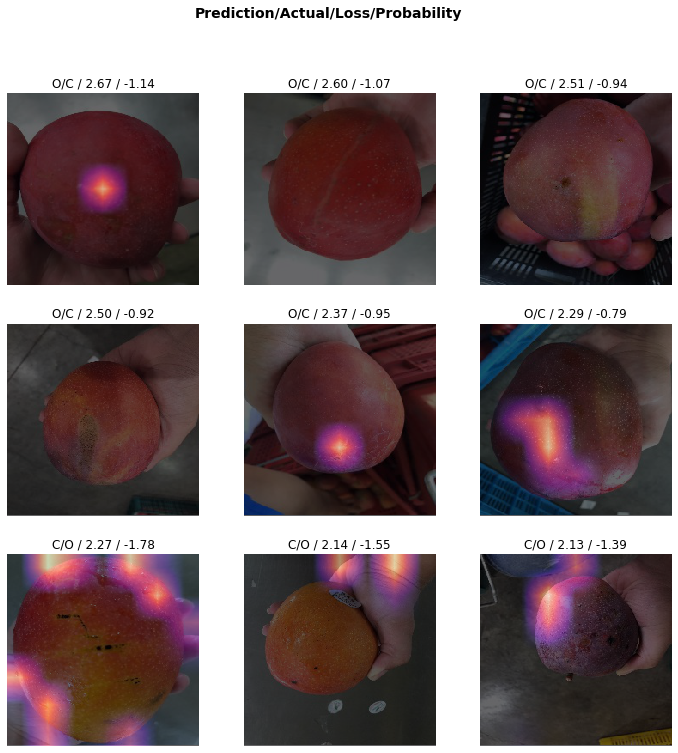

In [89]:
interp.plot_top_losses(9,heatmap=True)

In [90]:
learn.save('doubledensenet121_one')

### second

In [91]:
path = os.getcwd()+"/train_valid_testAB"
data = ImageList.from_folder(path)
data=data.split_by_folder('train','valid')
func = lambda x: str(x)[-5] if (str(x)[-5])=='A' else 'B' 
data=data.label_from_func(func)
tfms = get_transforms(do_flip=True,flip_vert=True)
bs=32
data=data.transform(tfms) \
          .databunch(bs=bs) \
          .normalize(imagenet_stats)

In [92]:
arch = models.densenet121

In [93]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True)

In [94]:
callbacks = [
SaveModelCallback(learn, monitor='recall',mode='max',name='densenet121_second')
,ShowGraph(learn),
]
learn.callbacks = callbacks

In [95]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


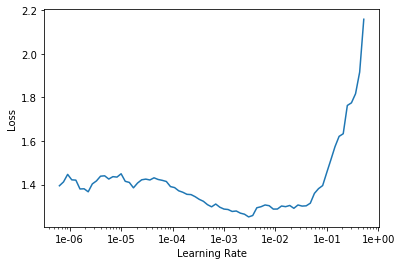

In [96]:
learn.lr_find()
learn.recorder.plot()

Better model found at epoch 0 with recall value: 0.737500011920929.


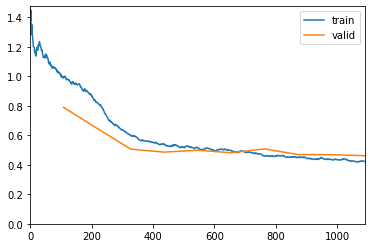

Better model found at epoch 1 with recall value: 0.7511364221572876.
Better model found at epoch 2 with recall value: 0.7784091234207153.
Better model found at epoch 3 with recall value: 0.8034090995788574.
Better model found at epoch 5 with recall value: 0.8136364221572876.
Better model found at epoch 7 with recall value: 0.8204545974731445.


In [97]:
#first train
learn.fit_one_cycle(10,max_lr=3e-03)

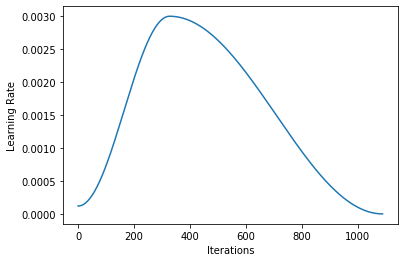

In [98]:
learn.recorder.plot_lr()

Better model found at epoch 0 with recall value: 0.8227273225784302.


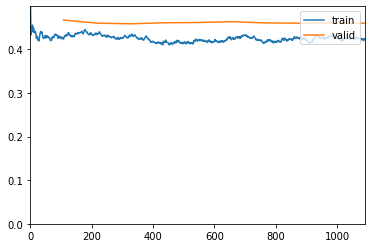

In [99]:
#fine tune
learn.fit_one_cycle(10,max_lr=3e-05)

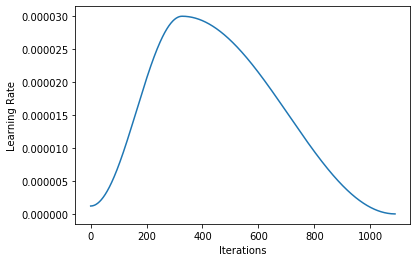

In [100]:
learn.recorder.plot_lr()

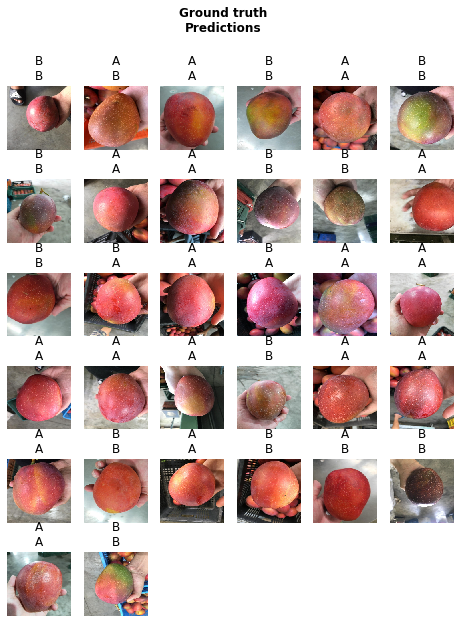

In [101]:
learn.show_results(ds_type=DatasetType.Valid, rows=6, figsize=(8,10))

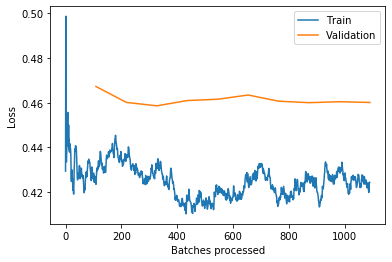

In [102]:
learn.recorder.plot_losses()

In [103]:
interp=ClassificationInterpretation.from_learner(learn)

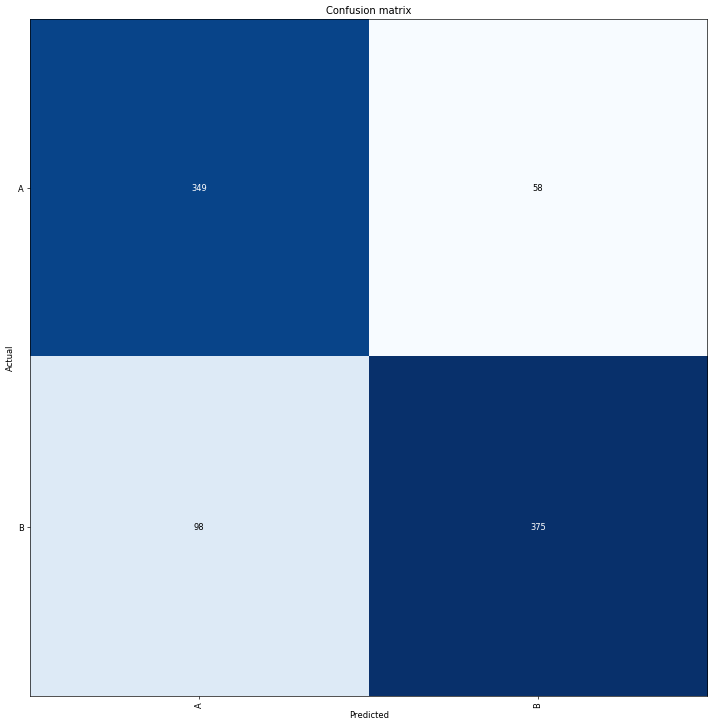

In [104]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

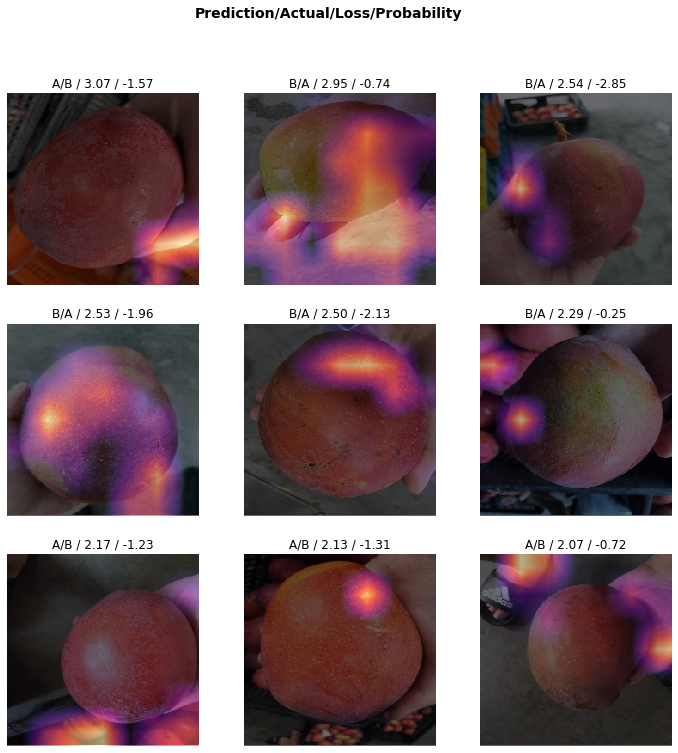

In [105]:
interp.plot_top_losses(9,heatmap=True)

In [106]:
learn.save('doubledensenet121_two')

# 預測test data、製作csv

## 單模型

In [ ]:
arch=models.resnet34

In [ ]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True).load('resnet34_10_epochs')

In [ ]:
import csv
with open('resnet34_10_epochs.csv', 'w', newline='') as csvfile:
     path=os.getcwd()+"/train_valid_test/test"
     writer = csv.writer(csvfile, delimiter=' ')
     writer.writerow(['image_id', 'label'])
     for i in sorted(os.listdir(path)):
            cat, tensor, probs = learn.predict(open_image(path+"/"+i))
            writer.writerow([i, cat.obj])

In [ ]:
arch=models.densenet121

In [ ]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True).load('densenet121_10_epochs')

In [ ]:
import csv
with open('densenet121_10_epochs.csv', 'w', newline='') as csvfile:
     path=os.getcwd()+"/train_valid_test/test"
     writer = csv.writer(csvfile, delimiter=' ')
     writer.writerow(['image_id', 'label'])
     for i in sorted(os.listdir(path)):
            cat, tensor, probs = learn.predict(open_image(path+"/"+i))
            writer.writerow([i, cat.obj])

## 雙模型

In [ ]:
arch=models.densenet121

In [ ]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True).load('doubledensenet121_one')

In [ ]:
with open('doubledensenet121.csv', 'w', newline='') as csvfile:
     path=os.getcwd()+"/train_valid_test/test"
     writer = csv.writer(csvfile, delimiter=' ')
     writer.writerow(['image_id', 'label'])
     for i in sorted(os.listdir(path)):
            cat, tensor, probs = learn.predict(open_image(path+"/"+i))
            if cat.obj!='C':
                shutil.copyfile(path+"/"+i,os.getcwd()+'/Test_AB'+"/"+i)
            else:    
                writer.writerow([i, cat.obj])

In [ ]:
learn = cnn_learner(data,arch,metrics=[accuracy,Recall('weighted'),FBeta('macro')],loss_func=LabelSmoothingCrossEntropy(),pretrained=True).load('doubledensenet121_two')

In [ ]:
with open('doubledensenet121.csv', 'a', newline='') as csvfile:
     path=os.getcwd()+'/Test_AB'
     writer = csv.writer(csvfile, delimiter=' ')
     for i in sorted(os.listdir(path)):
            cat, tensor, probs = learn.predict(open_image(path+"/"+i))
            if cat.obj == "A":
                writer.writerow([i, cat.obj])
            else:
                writer.writerow([i, 'B'])